<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Sebastián Acuña U.
- Nombre de alumno 2: Martín Guzmán S.

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/sebastianacunau/MDS7202-Laboratorios-y-Proyecto)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [57]:
data = pd.read_csv('energia_homero.csv')
data['date'] = pd.to_datetime(data['date'])


fig = px.line(data, x='date', y = 'Energy_kWh', title = 'Consumo de energía en el hogar de Homero')
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

Respuestas 1.2

3. Por lo que se puede ver hay estacionalidad en el consumo, este es mayor en los mese de julio y menor en los meses de enero. Aunque el valor del p-value en el test de ADF es menor a 5%, en caso de un intervalo al 97% de confianza, no se podria rechazar la hipotesis de que hay estacionalidad.
6. Por lo que se puede ver en el grafico, ahora no presentan estacionaliadad, no hay una clara diferecia en los peaks entre los mese julio y enero.
Ademas podemos observar el resultado del test de ADF que da un p-value muy bajo, lo que conlleva a que podemos rechazar la hipotesis de qu si hay estacionalidad.

In [58]:
#TAREA0 Holdout

data['conjunto'] = np.where(data['date'] <= '2020-02-29', 'train', 'test')
train = data[data['conjunto'] == 'train'].copy()
test = data[data['conjunto'] == 'test'].copy()
x_train = train[['date']]
y_train = train['Energy_kWh']
x_test = test[['date']]
y_test = test['Energy_kWh']



from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin


#Tarea 1 Pipeline


def date_to_numeric(X):
  return (X.iloc[:, 0] - X.iloc[:, 0].min()).dt.days.values.reshape(-1,1)


Pipeline_trend = Pipeline(
    [('Transformer', FunctionTransformer(date_to_numeric)),
        ('Modelo', LinearRegression())])

#Tarea 2 entrenamiento
Pipeline_trend.fit(x_train, y_train)
y_pred_train = Pipeline_trend.predict(x_train)
y_pred_test = Pipeline_trend.predict(x_test)
pred = np.concatenate((y_pred_train, y_pred_test))
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')


#Tarea 3

error_train = y_train - y_pred_train
error_test = y_test - y_pred_test
error = np.concatenate((error_train, error_test))

fig = px.line(x = data['date'], y = error, title = 'Error en la prediccion')
fig.show()

from statsmodels.tsa.stattools import adfuller

result = adfuller(error)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
#Tarea 4
class TimeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_order, periods):
        self.n = n_order
        self.p = periods
        self.start_date = None

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame) or 'date' not in X.columns:
            raise ValueError("X debe ser un pandas DataFrame con 'date' como columna.")
        self.start_date = X['date'].min()
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame) or 'date' not in X.columns:
            raise ValueError("X debe ser un pandas DataFrame con 'date' como columna.")
        if self.start_date is None:
             raise RuntimeError("El transformador no ha pasado por el fit")

        time_delta = (X['date'] - self.start_date).dt.days.values.reshape(-1, 1)

        fourier_features = []
        for i in range(1, self.n + 1):
            fourier_features.append(np.sin(2 * np.pi * i * time_delta / self.p))
            fourier_features.append(np.cos(2 * np.pi * i * time_delta / self.p))

        fourier_features_df = pd.DataFrame(
            np.hstack(fourier_features),
            columns=[f'fourier_{i}' for i in range(self.n * 2)],
            index=X.index
        )


        return fourier_features_df

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

transformer = TimeTransformer(n_order = 4, periods = 365)
transformer.fit_transform(x_train)

Pipeline_seasonal = Pipeline([
    ('fourier_features', TimeTransformer(n_order = 4, periods = 365)),
    ('linear_model', LinearRegression())
])

#Tarea 5

Pipeline_seasonal.fit(x_train, y_train)
y_pred_train = Pipeline_seasonal.predict(x_train)
y_pred_test = Pipeline_seasonal.predict(x_test)
pred_fourier = np.concatenate((y_pred_train, y_pred_test))
mae_train_fourier = mean_absolute_error(y_train, y_pred_train)
mae_test_fourier = mean_absolute_error(y_test, y_pred_test)
print(f'MAE train fourier: {mae_train_fourier}')
print(f'MAE test fourier: {mae_test_fourier}')

#tarea 6

error_train_fourier = y_train - y_pred_train
error_test_fourier = y_test - y_pred_test
error_fourier = np.concatenate((error_train_fourier, error_test_fourier))

fig = px.line(x = data['date'], y = error_fourier, title = 'Error en la prediccion con fourier')
fig.show()


from statsmodels.tsa.stattools import adfuller

result = adfuller(error_fourier)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

MAE train: 10.568154088025606
MAE test: 9.927510004809234


ADF Statistic: -2.9582959483785887
p-value: 0.03897686694465593
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
MAE train fourier: 5.38297930999739
MAE test fourier: 4.229842336358488


ADF Statistic: -9.566900262532375
p-value: 2.3439332458816835e-16
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [59]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

Respuesta 1.3

6. Podemos ver que la estacionalidad ya es casi inexistente en el grafo del error. Además se puede observar que en el test de ADF, el p-value es infimo, lo que indica que se puede rechazar la hipotesis de que hay estacionalidad.

23:44:48 - cmdstanpy - INFO - Chain [1] start processing
23:44:51 - cmdstanpy - INFO - Chain [1] done processing
/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

MAE train: 4.817757122459016
MAE test: 4.946426050010375


/var/folders/b2/7mmj0z0s7_s53sjs_pdc58qh0000gn/T/ipykernel_6353/526977139.py:25: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/var/folders/b2/7mmj0z0s7_s53sjs_pdc58qh0000gn/T/ipykernel_6353/526977139.py:26: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



ADF Statistic: -9.792973319038941
p-value: 6.281648942511312e-17
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


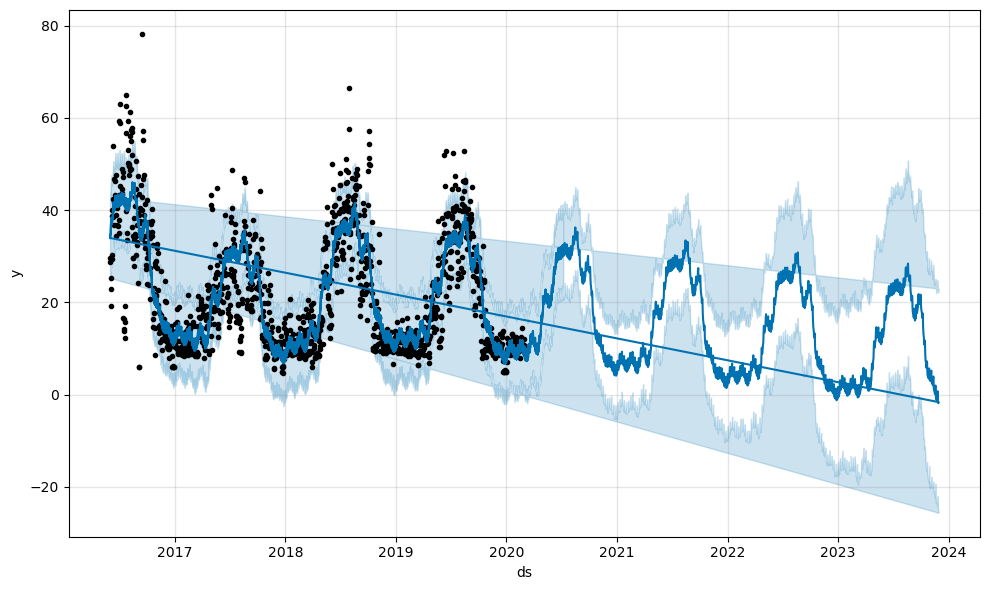

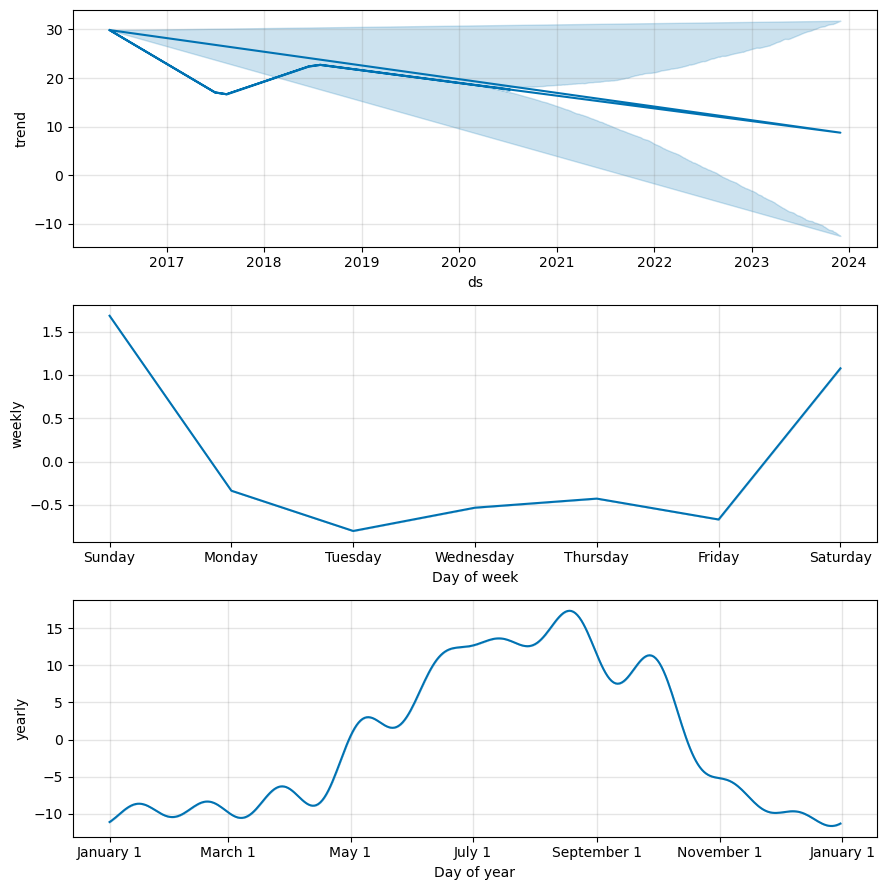

In [60]:
#TAREA 1

train.rename(columns = {'date': 'ds', 'Energy_kWh': 'y'}, inplace = True)
test.rename(columns = {'date': 'ds', 'Energy_kWh': 'y'}, inplace = True)

#TAREA 2
modelo = Prophet()
modelo.fit(train)
fut_train = modelo.make_future_dataframe(periods = len(train))
forecast_train = modelo.predict(fut_train)

fut_test = modelo.make_future_dataframe(periods = len(test))
forecast_test = modelo.predict(fut_test)
forecast = pd.concat([forecast_train, forecast_test])

train_forecast = pd.merge(train[['ds', 'y']], forecast[['ds', 'yhat']], on='ds', how='inner')
test_forecast = pd.merge(test[['ds', 'y']], forecast[['ds', 'yhat']], on='ds', how='inner')

#TAREA 3

#Tarea 3

fig = modelo.plot(forecast)
fig2 = modelo.plot_components(forecast)
fig.show()
fig2.show()


#Tarea 4
y_pred_train = train_forecast['yhat']
y_pred_test = test_forecast['yhat']
y_true_train = train_forecast['y']
y_true_test = test_forecast['y']
mae_train = mean_absolute_error(y_true_train, y_pred_train)
mae_test = mean_absolute_error(y_true_test, y_pred_test)
print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')

#Tarea 5
error_train = y_true_train - y_pred_train
error_test = y_true_test - y_pred_test

error_prophet = pd.concat([error_train.reset_index(drop=True), error_test.reset_index(drop=True)])

error_dates = pd.concat([train_forecast['ds'].reset_index(drop=True), test_forecast['ds'].reset_index(drop=True)])


fig3 = px.line(x=error_dates, y=error_prophet, title='Error en la prediccion con Prophet')
fig3.show()

from statsmodels.tsa.stattools import adfuller

result = adfuller(error_prophet)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

Podemos ver que el mae va en descenso tanto en train como en test, por ende, estas variables si influyen en el consumo energetico de homero. Ademas se puede ver que no hay estacionalidad en los errores, por lo que podemos asignarle ruido blanco. Ademas con el test de adf, podemos ver que si hay evidencia para rechazar la hipotesis de que si hay estacionalidad.

23:44:56 - cmdstanpy - INFO - Chain [1] start processing
23:44:57 - cmdstanpy - INFO - Chain [1] done processing
/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/var/folders/b2/7mmj0z0s7_s53sjs_pdc58qh0000gn/T/ipykernel_6353/308631349.py:50: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-pac

MAE train prophet con regresores: 4.667957668599536
MAE test prophet con regresores: 4.504309910790521


ADF Statistic: -11.426456162709341
p-value: 6.677039517209684e-21
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


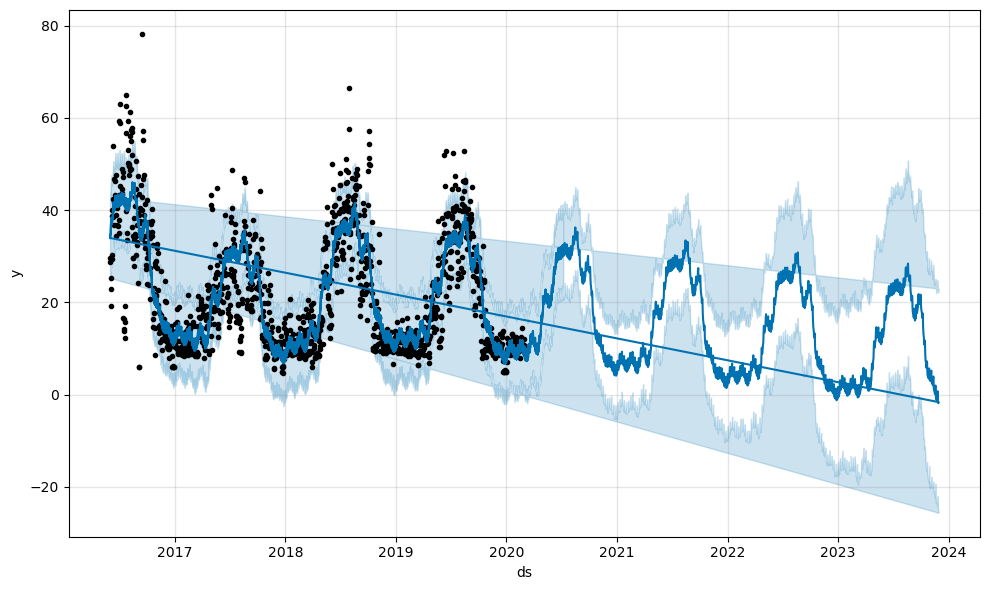

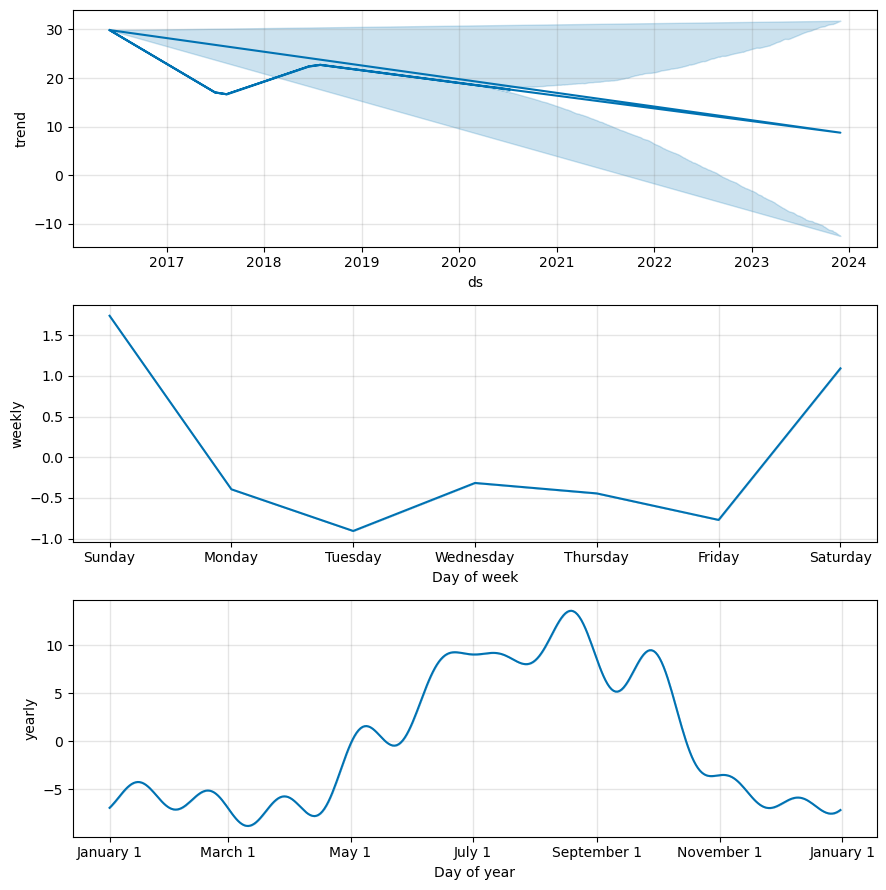

In [61]:
#Tarea 0:
datos_frink = pd.read_csv('datos_frink.csv')
datos_frink = datos_frink.rename(columns = {'date': 'ds'})
datos_frink['ds'] = pd.to_datetime(datos_frink['ds'])

datos_frink_train = datos_frink[datos_frink['ds'] <= '2020-02-29'].copy()
datos_frink_test = datos_frink[datos_frink['ds'] > '2020-02-29'].copy()

train1 = train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test1 = test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'} )


train1_subset = train1[['ds', 'y']].copy()
test1_subset = test1[['ds', 'y']].copy()

train1 = train1_subset.merge(datos_frink_train, on = 'ds', how='left')
test1 = test1_subset.merge(datos_frink_test, on = 'ds', how='left')


#Tarea 1:
model_reg = Prophet()

regressor_cols = [col for col in datos_frink.columns if col not in ['ds', 'set']]
for col in regressor_cols:
    model_reg.add_regressor(col)

model_reg.fit(train1)

# Tarea 2:
datos_frink_test_forecast = datos_frink_test[['ds'] + regressor_cols]
datos_frink_train_forecast = datos_frink_train[['ds'] + regressor_cols]


future_train = model_reg.make_future_dataframe(periods=0, include_history=True)
future_train1 = future_train.merge(datos_frink_train_forecast, on='ds', how='left')
future_test1 = model_reg.make_future_dataframe(periods=len(datos_frink_test_forecast), include_history=False)
future_test1 = future_test1.merge(datos_frink_test_forecast, on='ds', how='left')



forecast_train = model_reg.predict(future_train1)
forecast_test = model_reg.predict(future_test1)
forecast1 = pd.concat([forecast_train, forecast_test])
#modifiacion para que no haya que llamar a 2 datasets y tenerlo todo en 1 para calcular mae y errores
train_forecast1 = pd.merge(train[['ds', 'y']], forecast1[['ds', 'yhat']], on='ds', how='inner')
test_forecast1 = pd.merge(test[['ds', 'y']], forecast1[['ds', 'yhat']], on='ds', how='inner')


fig1 = model_reg.plot(forecast)
fig1.show()
fig2 = model_reg.plot_components(forecast)
fig2.show()


#Tarea 3
y_pred_train = train_forecast1['yhat']
y_pred_test = test_forecast1['yhat']
y_true_train = train_forecast1['y']
y_true_test = test_forecast1['y']
mae_train = mean_absolute_error(y_true_train, y_pred_train)
mae_test = mean_absolute_error(y_true_test, y_pred_test)
print(f'MAE train prophet con regresores: {mae_train}')
print(f'MAE test prophet con regresores: {mae_test}')


#Tarea 4

error_train1 = y_true_train - y_pred_train
error_test1 = y_true_test - y_pred_test
error_prophet_con_regresores = pd.concat([error_train1.reset_index(drop=True), error_test1.reset_index(drop=True)])
error_dates1 = pd.concat([train_forecast1['ds'].reset_index(drop=True), test_forecast1['ds'].reset_index(drop=True)])

fig3 = px.line(x=error_dates1, y=error_prophet_con_regresores, title='Error en la prediccion con Prophet con Regresores')
fig3.show()



from statsmodels.tsa.stattools import adfuller

result = adfuller(error_prophet_con_regresores)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))




## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**
1. Para cada varuable se aplicaran los siguientes lags:

  Temp_avg, 5;
  Dew_avg, 5;
  Hum_avg, 4;
  wind_avg, 2;
  press_avg, 4. Esto se observo en los graficos con aquellos grafos que sobresalian la zona celeste de manera mas notoria a los demas.

6. Los resultados del MAE en test son infimamente peores que los de la parte 1.4, lo que podria resultar en que nuestro mdeolo esta sobrejustando. Los resultados en MAE train son mejores que la parte anterior. lo que justifica la posibilidad de overfitting.

7. Teemos que hay un comportamiento estacional, tanto graficamente como en el tes de adf, aunque el p-value resulato mayor que en l parte 1.4.

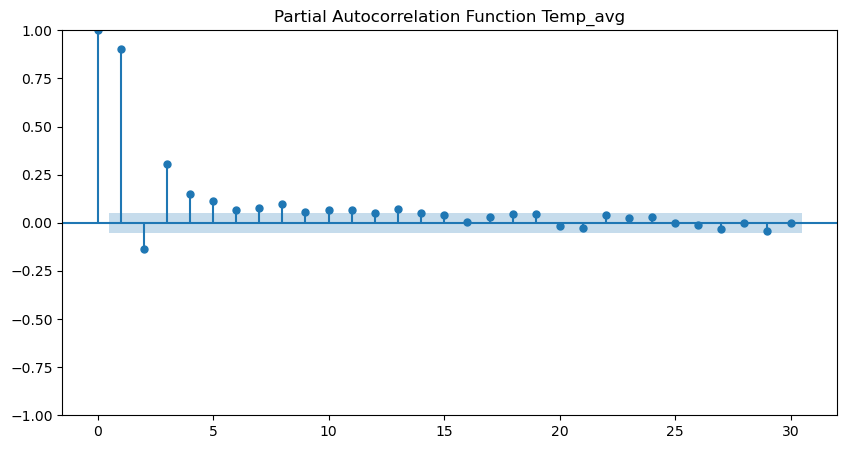

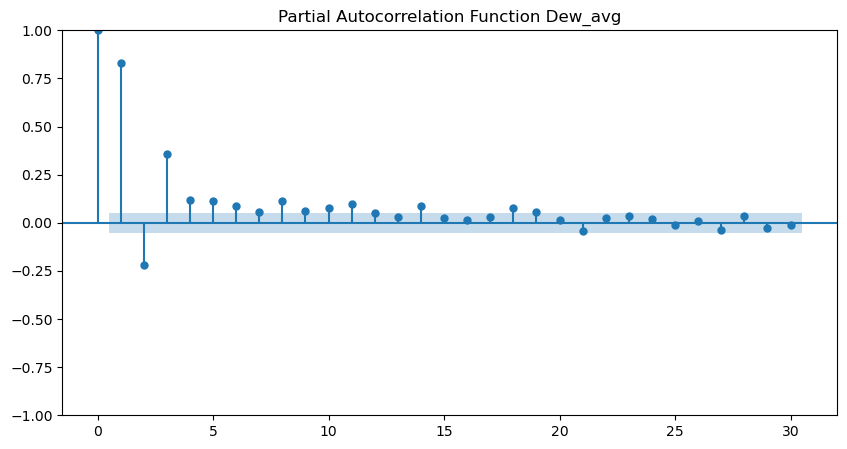

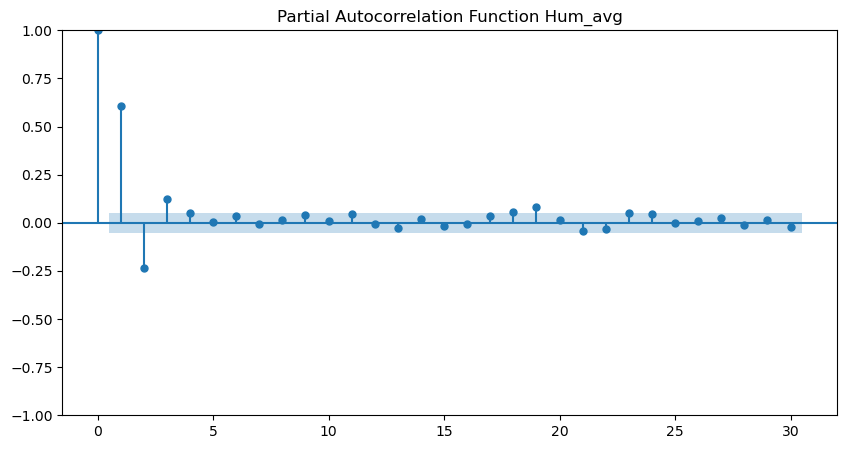

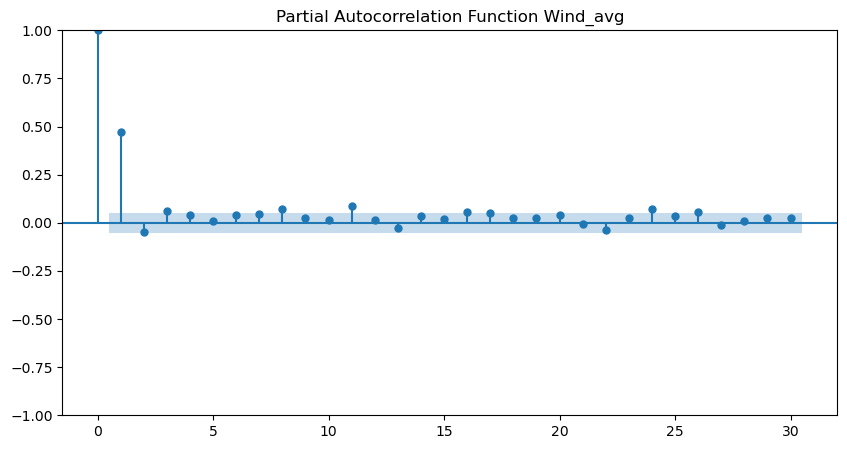

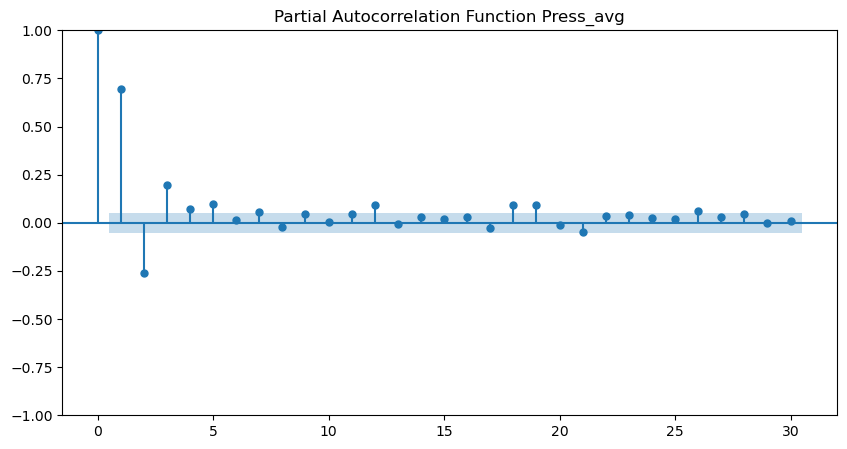

23:45:04 - cmdstanpy - INFO - Chain [1] start processing
23:45:05 - cmdstanpy - INFO - Chain [1] done processing
/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/var/folders/b2/7mmj0z0s7_s53sjs_pdc58qh0000gn/T/ipykernel_6353/3633038186.py:143: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/Users/sebastianacunaurzua/opt/anaconda3/lib/python3.12/site-p

MAE train prophet con lags: 4.6056890881703065
MAE test prophet con lags: 4.487487286903776


ADF Statistic: -11.405529626387265
p-value: 7.465935035423587e-21
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


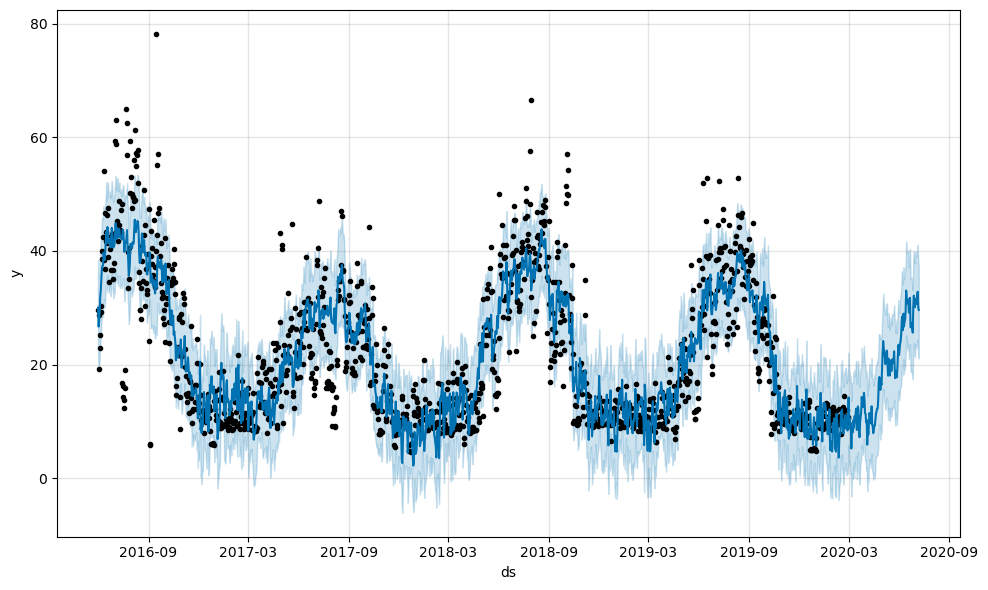

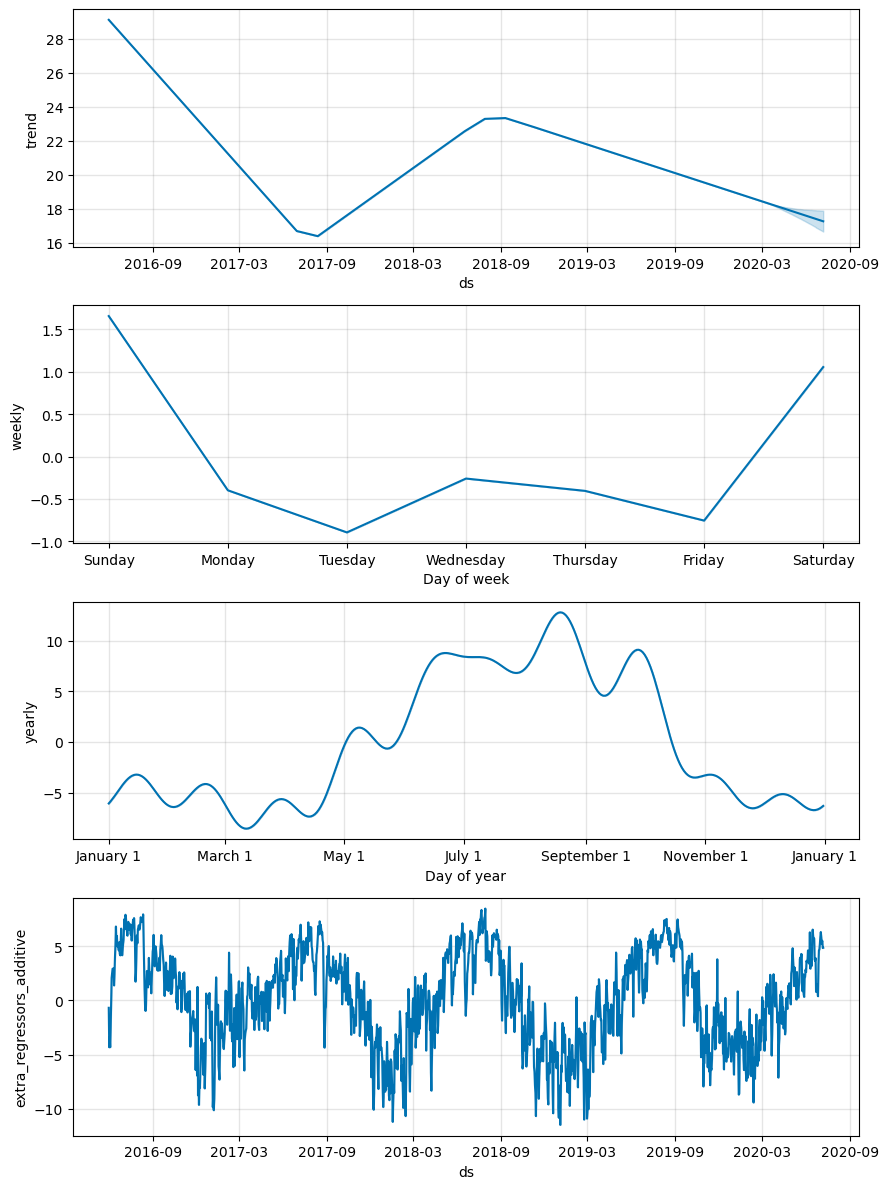

In [62]:
#Tarea 1
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

avg_columnas = ['Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Press_avg']

for col in avg_columnas:
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_pacf(datos_frink[col].dropna(), ax=ax, lags=30, alpha=0.05)
    ax.set_title(f'Partial Autocorrelation Function {col}')
    plt.show()


# Tarea 2
lags_columnas = {
    'Temp_avg': [1, 2, 3, 4, 5],
    'Dew_avg': [1, 2, 3, 4, 5],
    'Hum_avg': [1, 2, 3, 4],
    'Wind_avg': [1, 2],
    'Press_avg': [1, 2, 3, 4]
}

datos_frink_train_lag = datos_frink[datos_frink['ds'] <= '2020-02-29'].copy()
datos_frink_test_lag = datos_frink[datos_frink['ds'] > '2020-02-29'].copy()

new_lag_cols_train = []
for col, lags in lags_columnas.items():
    for lag in lags:
        lag_col_name = f'{col}_lag_{lag}'
        datos_frink_train_lag[lag_col_name] = datos_frink_train_lag[col].shift(lag)
        new_lag_cols_train.append(lag_col_name)


new_lag_cols_test = []
for col, lags in lags_columnas.items():
    for lag in lags:
        lag_col_name = f'{col}_lag_{lag}'
        datos_frink_test_lag[lag_col_name] = datos_frink_test_lag[col].shift(lag)
        new_lag_cols_test.append(lag_col_name)


cols_merge_train = ['ds'] + new_lag_cols_train
cols_merge_test = ['ds'] + new_lag_cols_test
datos_frink_lag_features_train = datos_frink_train_lag[cols_merge_train].copy()
datos_frink_lag_features_test = datos_frink_test_lag[cols_merge_test].copy()



train2 = train1.merge(datos_frink_lag_features_train, on='ds', how='left')
test2 = test1.merge(datos_frink_lag_features_test, on='ds', how='left')

train2 = train2.drop(columns=[col for col in train2.columns if col.endswith('_y')])
train2 = train2.drop(columns=[col for col in train2.columns if col.endswith('_x')])
test2 = test2.drop(columns=[col for col in test2.columns if col.endswith('_y')])
test2 = test2.drop(columns=[col for col in test2.columns if col.endswith('_x')])


cols_eliminar_train = []
for col in train.columns:
    if col.endswith('_lag'):
            cols_eliminar_train.append(col)

cols_eliminar_test = []
for col in test.columns:
   if col.endswith('_lag'):
            cols_eliminar_test.append(col)

train_lags = train2.drop(columns=cols_eliminar_train, errors='ignore')
test_lags = test2.drop(columns=cols_eliminar_train, errors='ignore')

#display(train_lags)
#display(test_lags)










#tarea 3

lag_columnas = [col for col in train_lags.columns if 'lag' in col]
train_lags1 = train_lags.copy()
test_lags1 = test_lags.copy()
for col in lag_columnas:
    if col in train_lags.columns:
        mean_val_train = train_lags[col].mean()
        train_lags1[col] = train_lags[col].fillna(mean_val_train)
        if col in test_lags.columns:
            mean_val_test = test_lags[col].mean()
            test_lags1[col] = test_lags[col].fillna(mean_val_test)






#tarea 4
model = Prophet()
regressor_cols1 = [col for col in train_lags1.columns if col not in ['ds','y']]
for col in regressor_cols1:
    model.add_regressor(col)
model.fit(train_lags1)







#datos_frink_test_lag1 = datos_frink_test_lag[['ds'] + regressor_cols1]

datos_frink_test_lag1 = test_lags1[['ds'] + regressor_cols1]
#print(datos_frink_test_lag1.isnull().sum())

datos_frink_train_lag1 = train_lags1[['ds'] + regressor_cols1]
#print(datos_frink_train_lag1.isnull().sum())


future_train_lag = model.make_future_dataframe(periods = 0, include_history=True)
future_train_lag = future_train_lag.merge(datos_frink_train_lag1, on='ds', how='left')
future_test_lag = model.make_future_dataframe(periods=len(datos_frink_test_lag1), include_history=False)
future_test_lag = future_test_lag.merge(datos_frink_test_lag1, on='ds', how='left')

#print(future_train_lag.isnull().sum())
#print(future_test_lag.isnull().sum())

forecast_train_lag = model.predict(future_train_lag)
forecast_test_lag = model.predict(future_test_lag)
forecast_lag = pd.concat([forecast_train_lag, forecast_test_lag])

train_forecast_lag = pd.merge(train[['ds', 'y']], forecast_lag[['ds', 'yhat']], on='ds', how='inner')
test_forecast_lag = pd.merge(test[['ds', 'y']], forecast_lag[['ds', 'yhat']], on='ds', how='inner')



#tarea 5

fig1 = model.plot(forecast_lag)
fig1.show()
fig2 = model.plot_components(forecast_lag)
fig2.show()


#TAREA 6

y_true_train_lag = train_forecast_lag['y']
y_pred_train_lag = train_forecast_lag['yhat']
y_true_test_lag = test_forecast_lag['y']
y_pred_test_lag = test_forecast_lag['yhat']
mae_train_lag = mean_absolute_error(y_true_train_lag, y_pred_train_lag)
mae_test_lag = mean_absolute_error(y_true_test_lag, y_pred_test_lag)
print(f'MAE train prophet con lags: {mae_train_lag}')
print(f'MAE test prophet con lags: {mae_test_lag}')


#tarea 7
error_train_lag = y_true_train_lag - y_pred_train_lag
error_test_lag = y_true_test_lag - y_pred_test
error_prophet_con_lags = pd.concat([error_train_lag.reset_index(drop=True), error_test_lag.reset_index(drop=True)])
error_dates_lag = pd.concat([train_forecast_lag['ds'].reset_index(drop=True), test_forecast_lag['ds'].reset_index(drop=True)])

fig3 = px.line(x=error_dates_lag, y=error_prophet_con_lags, title='Error en la prediccion con Prophet con Lags')
fig3.show()

from statsmodels.tsa.stattools import adfuller

result = adfuller(error_prophet_con_lags)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))








## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


**Respuesta:**

5. Se hizo dos opcions, un modeo optimo con lags y uno sin lags. Los resultados indicaron que el modelo con lags fue el mejor. Aunque tuvo mayor MAE Train que el modelo lags no optimizado, el MAE Test fue el mejor hasta el momento con un  valor de 4.0474323, lo que indica poder de gerenalizacion en el set de testo y en las predcciones en gereral.
Analizando la grafica de los erroes, se puede ver graficamente que no hay estacionaliad. y e confirma con el p-value infimo, resultado del test de ADF.

In [ ]:

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params




Tuning Prophet parameters: 100%|██████████| 96/96 [03:13<00:00,  2.01s/it]


    changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
14                    0.001                      1.0         additive   
33                    0.010                      0.1   multiplicative   
40                    0.010                      1.0   multiplicative   
39                    0.010                      1.0   multiplicative   
35                    0.010                      0.1   multiplicative   
..                      ...                      ...              ...   
94                    0.500                     10.0   multiplicative   
82                    0.500                      0.1   multiplicative   
83                    0.500                      0.1   multiplicative   
95                    0.500                     10.0   multiplicative   
89                    0.500                      1.0   multiplicative   

    changepoint_range       MAEs  
14                0.9   4.047432  
33                0.7   4.095540  
40                

ADF Statistic: -9.644763484672604
p-value: 1.488007021429395e-16
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


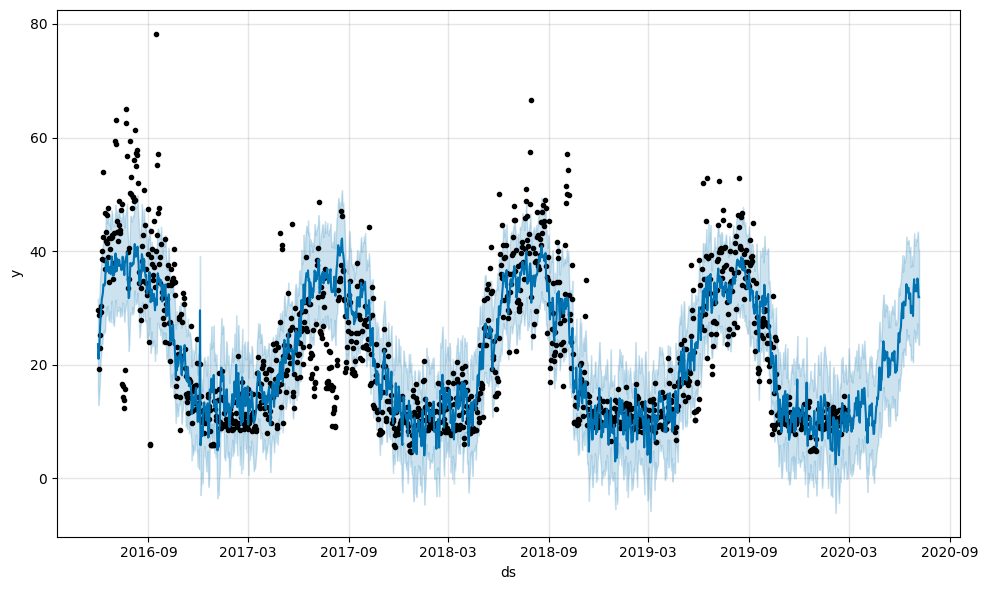

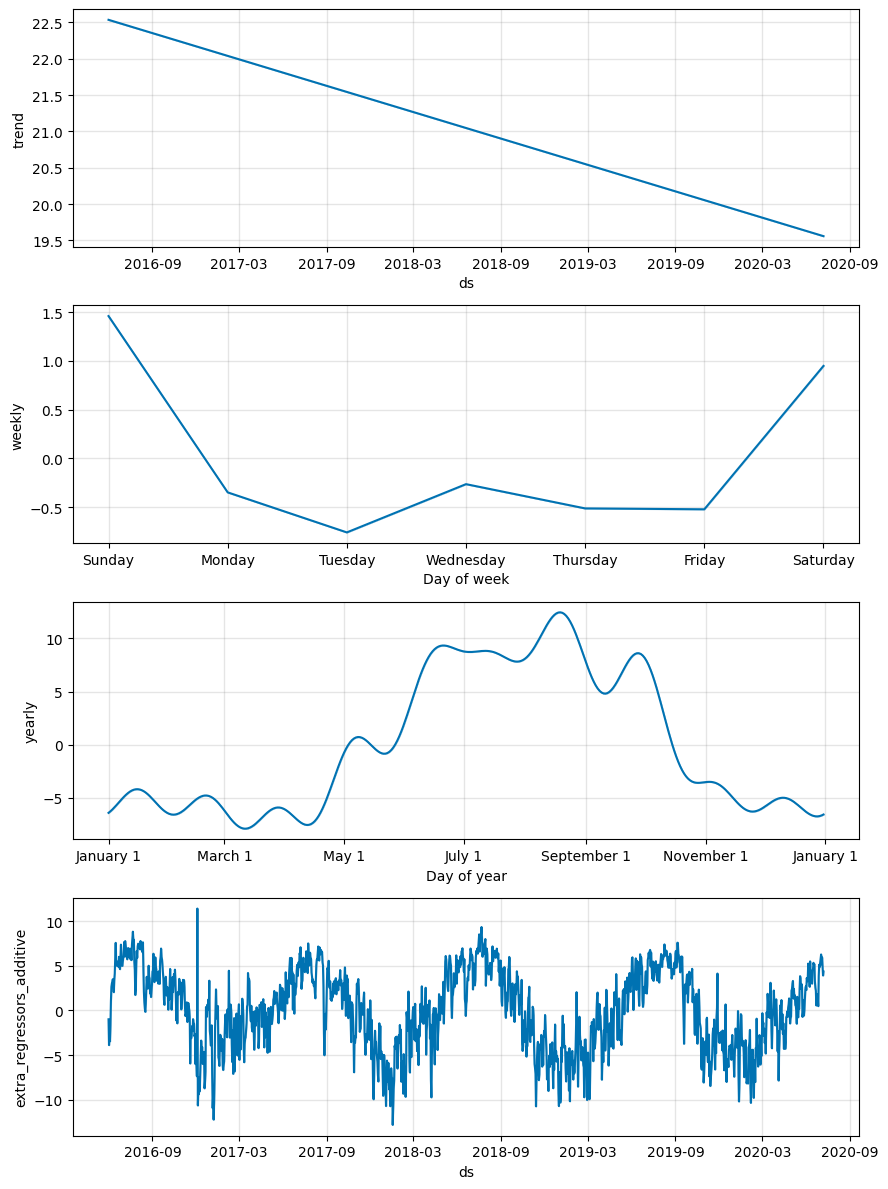

In [ ]:
#Tarea 1 opcion con lags

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.7, 0.8, 0.9]
}

features = [col for col in train_lags.columns if col not in ['ds', 'y']]

tuning_results, best_params = optimize_prophet(train_lags1, test_lags1, features, param_grid)
print(tuning_results)
print(best_params)



#tarea 2
modelo = Prophet(**best_params)
for feature in features:
    modelo.add_regressor(feature)
modelo.fit(train_lags1)





futuro_train = modelo.make_future_dataframe(periods=0, include_history=True)
futuro_train = futuro_train.merge(train_lags1, on='ds', how='left')
forecast_train_lag = modelo.predict(futuro_train)



futuro_test = modelo.make_future_dataframe(periods=len(test_lags1), include_history=False)
futuro_test = futuro_test.merge(test_lags1, on='ds', how='left')
forecast_test_lag = modelo.predict(futuro_test)

forecast_lag = pd.concat([forecast_train_lag, forecast_test_lag])

forecast_lag_train = pd.merge(train_lags[['ds', 'y']], forecast_lag[['ds', 'yhat']], on='ds', how='inner')
forecast_lag_test = pd.merge(test_lags[['ds', 'y']], forecast_lag[['ds', 'yhat']], on='ds', how='inner')

#Tarea 3

fig1 = modelo.plot(forecast_lag)
fig1.show()
fig2 = modelo.plot_components(forecast_lag)
fig2.show()

#Tarea 4
y_true_train_lag = forecast_lag_train['y']
y_pred_train_lag = forecast_lag_train['yhat']
y_true_test_lag = forecast_lag_test['y']
y_pred_test_lag = forecast_lag_test['yhat']
mae_train_lag = mean_absolute_error(y_true_train_lag, y_pred_train_lag)
mae_test_lag = mean_absolute_error(y_true_test_lag, y_pred_test_lag)
print(f'MAE train prophet con lags optimizado: {mae_train_lag}')
print(f'MAE test prophet con lags optimizado: {mae_test_lag}')

#tarea 5

error_train_lag = y_true_train_lag - y_pred_train_lag
error_test_lag = y_true_test_lag - y_pred_test_lag
error_prophet_con_lags_optimo = pd.concat([error_train_lag.reset_index(drop=True), error_test_lag.reset_index(drop=True)])
error_dates_lag_optimo = pd.concat([forecast_lag_train['ds'].reset_index(drop=True), forecast_lag_test['ds'].reset_index(drop=True)])

fig3 = px.line(x=error_dates_lag_optimo, y=error_prophet_con_lags_optimo, title='Error en la prediccion con Prophet con Lags optimizado')
fig3.show()


from statsmodels.tsa.stattools import adfuller

result = adfuller(error_prophet_con_lags_optimo)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



MAE train prophet con regresores optimizado: 5.311441771051695
MAE test prophet con regresores optimizado: 4.066536930110033


ADF Statistic: -9.545612315318124
p-value: 2.654371230653852e-16
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


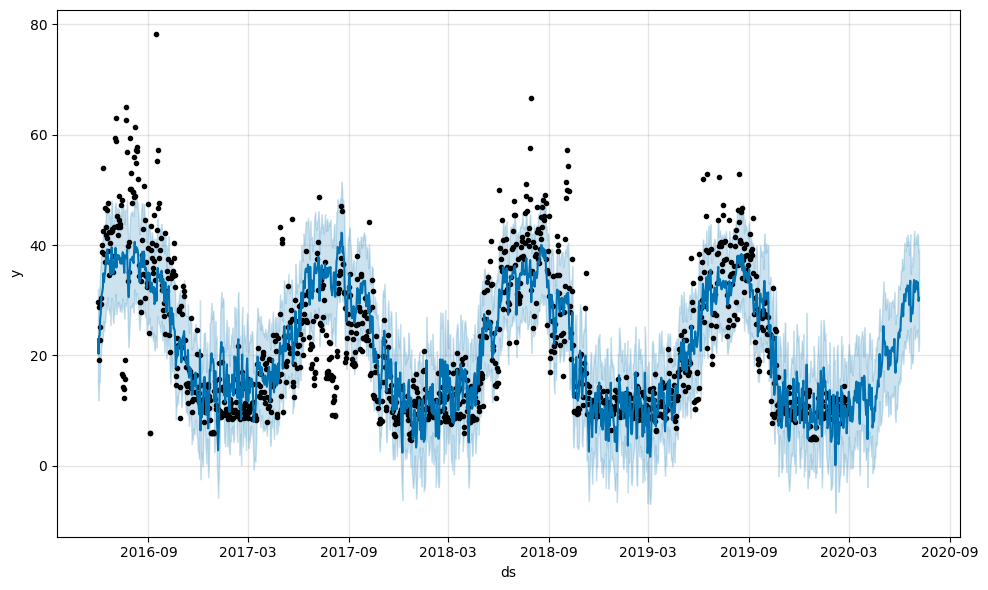

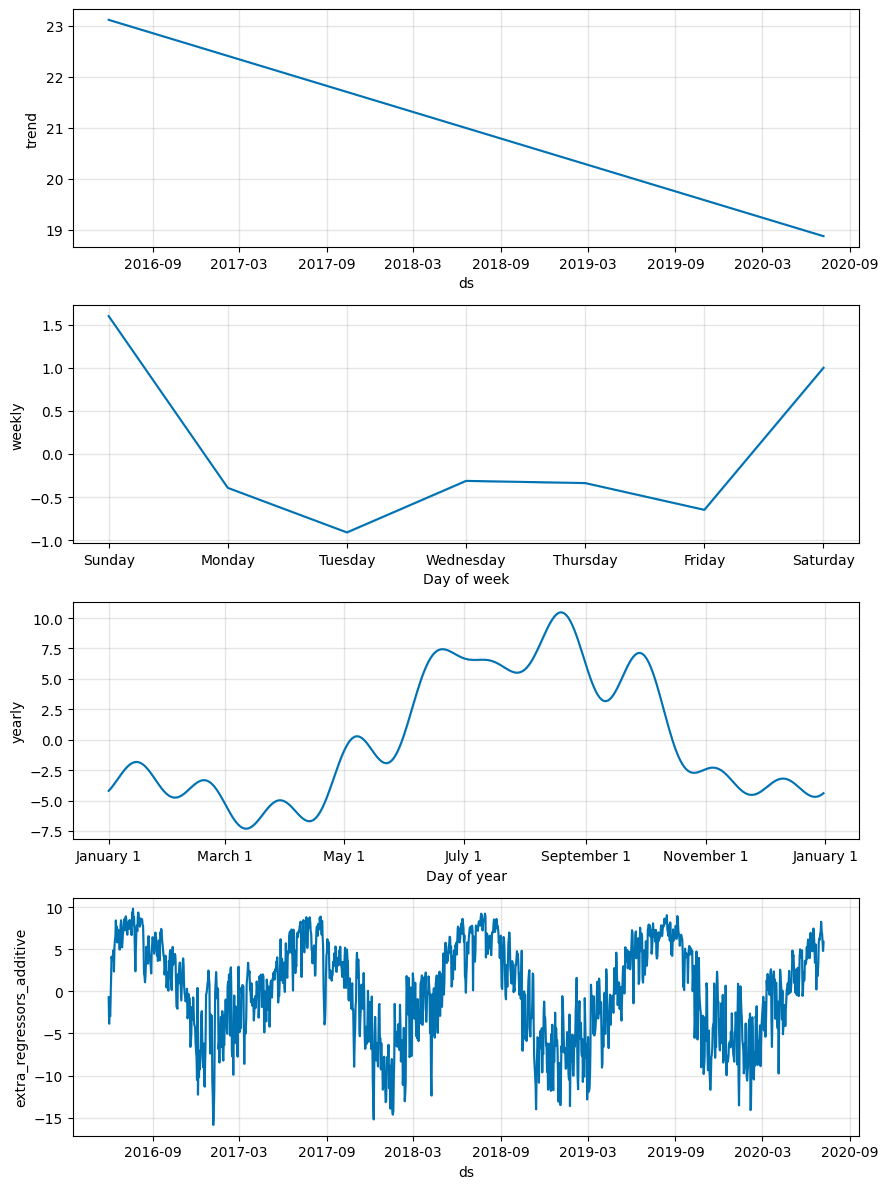

In [ ]:
#Tarea 1 opcion sin lags

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.7, 0.8, 0.9]
}

features = [col for col in train1.columns if col not in ['ds', 'y']]

tuning_results, best_params = optimize_prophet(train1, test1, features, param_grid)
print(tuning_results)
print(best_params)



#tarea 2
modelo = Prophet(**best_params)
for feature in features:
    modelo.add_regressor(feature)
modelo.fit(train1)





futuro_train1 = modelo.make_future_dataframe(periods=0, include_history=True)
futuro_train1 = futuro_train1.merge(train1, on='ds', how='left')
forecast_train1 = modelo.predict(futuro_train1)



futuro_test1 = modelo.make_future_dataframe(periods=len(test1), include_history=False)
futuro_test1 = futuro_test1.merge(test1, on='ds', how='left')
forecast_test1 = modelo.predict(futuro_test1)

forecast_1 = pd.concat([forecast_train1, forecast_test1])

forecast_train = pd.merge(train1[['ds', 'y']], forecast_1[['ds', 'yhat']], on='ds', how='inner')
forecast_test = pd.merge(test1[['ds', 'y']], forecast_1[['ds', 'yhat']], on='ds', how='inner')

#Tarea 3

fig1 = modelo.plot(forecast_1)
fig1.show()
fig2 = modelo.plot_components(forecast_1)
fig2.show()

#Tarea 4
y_true_train_1 = forecast_train['y']
y_pred_train_1 = forecast_train['yhat']
y_true_test_1 = forecast_test['y']
y_pred_test_1 = forecast_test['yhat']
mae_train_1 = mean_absolute_error(y_true_train_1, y_pred_train_1)
mae_test_1 = mean_absolute_error(y_true_test_1, y_pred_test_1)
print(f'MAE train prophet con regresores optimizado: {mae_train_1}')
print(f'MAE test prophet con regresores optimizado: {mae_test_1}')

#tarea 5

error_train_1 = y_true_train_1 - y_pred_train_1
error_test_1 = y_true_test_1 - y_pred_test_1
error_prophet_optimo = pd.concat([error_train_1.reset_index(drop=True), error_test_1.reset_index(drop=True)])
error_dates_optimo = pd.concat([forecast_train['ds'].reset_index(drop=True), forecast_test['ds'].reset_index(drop=True)])

fig3 = px.line(x=error_dates_lag_optimo, y=error_prophet_optimo, title='Error en la prediccion con Prophet con regresores optimizado')
fig3.show()


from statsmodels.tsa.stattools import adfuller

result = adfuller(error_prophet_optimo)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [4]:
#!pip install surprise

In [32]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [3]:
#CODIGO AQUI
cervezas_df = pd.read_csv('cervezas.csv')
cervezas_df.head()

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA


In [4]:
cervezas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295059 entries, 0 to 295058
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     295059 non-null  int64  
 1   beerId     295059 non-null  int64  
 2   rating     295059 non-null  float64
 3   beerName   295059 non-null  object 
 4   beerStyle  295059 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.3+ MB


In [5]:
cervezas_df.isnull().mean()

userId       0.0
beerId       0.0
rating       0.0
beerName     0.0
beerStyle    0.0
dtype: float64

In [6]:
cervezas_df.nunique()

userId        706
beerId       3747
rating          9
beerName     3689
beerStyle     101
dtype: int64

In [7]:
cervezas_df['rating'].unique()

array([3. , 4. , 5. , 3.5, 2. , 4.5, 2.5, 1. , 1.5])

* Hay 3747 cervezas diferentes siendo evaluadas.
* Hay un total de 706 ciudadanos/usuarios participando de la evaluación.
* La escala de evaluación va desde 1.0 a 5.0, con intervalos de 0.5.
* No hay valores nulos en la data.

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

### Ítem 1

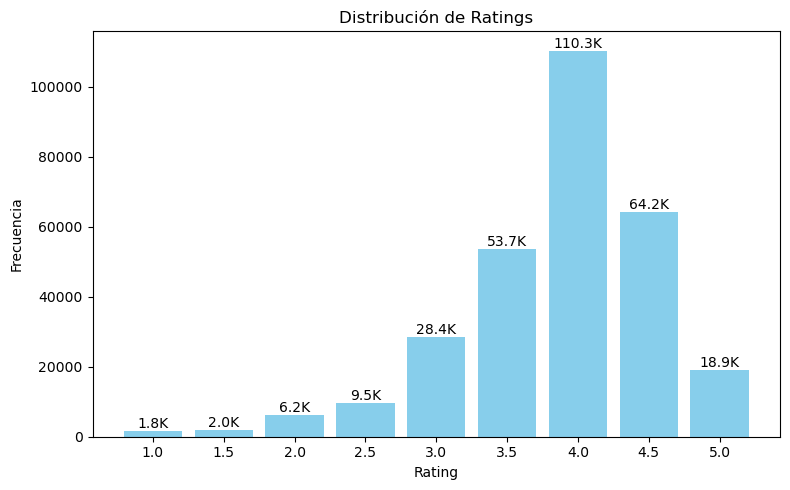

In [ ]:
rating_counts = cervezas_df['rating'].value_counts().sort_index()
ratings = rating_counts.index.values
counts = rating_counts.values

bar_width = 0.7
separation = 0.15
x = np.arange(len(ratings)) * (bar_width + separation)

plt.figure(figsize=(8,5))
bars = plt.bar(x, counts, width=bar_width, color='skyblue', align='center')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')
plt.xticks(x, ratings)

# Agregar etiquetas encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height >= 1000:
        label = f"{height/1000:.1f}K"
    else:
        label = f"{int(height)}"
    plt.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [20]:
# Estadísticas descriptivas de la columna 'rating'
stats_rating = cervezas_df['rating'].describe()

print("Estadísticas descriptivas de la columna 'rating':")
print(stats_rating)

Estadísticas descriptivas de la columna 'rating':
count    295059.000000
mean          3.860367
std           0.702807
min           1.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: rating, dtype: float64


In [ ]:
# Promedio de rating para cada beerId
mean_rating_per_beer = cervezas_df.groupby('beerId')['rating'].mean()

# Promedio de los promedios
mean_of_means = mean_rating_per_beer.mean()
print("Promedio de los promedios de rating por beerId:", mean_of_means)

Promedio de los promedios de rating por beerId: 3.7860744095484606


> **Respuestas Ítem 1:**
>
> * Hay 706 usuarios en los datos.
> * Hay 3747 productos en los datos.
> * Hay 295.059 calificaciones en los datos.
> * No hay calificaciones faltantes.
> * La media de las calificaciones entregada por los usuarios es 3.86 de 5. Dependiendo del producto, la calificación promedio es 3.78 de 5.

### Observación extra

Hay algunas inconsistencias en la data, en particular hay algunas cervezas con el mismo nombre y tipo cuyos IDs son diferentes. Se omitirá hacer un tratamiento en este ítem, pero se deja constancia de lo encontrado.

In [19]:
# Encontrar beerName duplicados con diferentes beerId
duplicated_beernames = cervezas_df.groupby('beerName')['beerId'].nunique()
duplicated_beernames = duplicated_beernames[duplicated_beernames > 1].index

# Filtrar el dataframe para esos beerName y mostrar beerName, beerId y beerStyle
duplicated_beers = cervezas_df[cervezas_df['beerName'].isin(duplicated_beernames)][['beerName', 'beerId', 'beerStyle']]
duplicated_beers = duplicated_beers.drop_duplicates().sort_values(['beerName', 'beerId'])

for name, group in duplicated_beers.groupby('beerName'):
    print(f"beerName: {name}")
    for _, row in group.iterrows():
        print(f"  beerId: {row['beerId']}, beerStyle: {row['beerStyle']}")
    print()

beerName: Big Swell IPA
  beerId: 27364, beerStyle: American IPA
  beerId: 40628, beerStyle: American IPA

beerName: Bière De Mars
  beerId: 25142, beerStyle: Bière de Garde
  beerId: 31748, beerStyle: Bière de Garde

beerName: Black Hole
  beerId: 16637, beerStyle: Old Ale
  beerId: 33929, beerStyle: Russian Imperial Stout

beerName: Brown Ale
  beerId: 1647, beerStyle: English Brown Ale
  beerId: 14163, beerStyle: English Brown Ale

beerName: Chocolate Porter
  beerId: 6499, beerStyle: American Porter
  beerId: 10408, beerStyle: American Porter

beerName: Chocolate Stout
  beerId: 1118, beerStyle: American Stout
  beerId: 20807, beerStyle: American Stout

beerName: Christmas Ale
  beerId: 1999, beerStyle: American Brown Ale
  beerId: 3508, beerStyle: Winter Warmer
  beerId: 39286, beerStyle: Belgian Strong Dark Ale

beerName: CoCoNut Porter
  beerId: 34850, beerStyle: American Porter
  beerId: 37795, beerStyle: American Porter

beerName: Double Chocolate Stout
  beerId: 40798, beerSt

### Ítem 2

In [18]:
# Transformar el dataframe de pandas a un surprise Dataset
reader = Reader(rating_scale = (1, 5))
colab_df = cervezas_df[['userId', 'beerId', 'rating']].copy()
dataset = Dataset.load_from_df(colab_df, reader)

In [17]:
dataset.df

,userId,beerId,rating
0,144,995,3.0
1,63,58695,4.0
2,147,4083,5.0
3,4261,40310,3.0
4,140,1904,5.0
...,...,...,...
295054,863,45653,4.0
295055,306,1341,4.0
295056,8,8917,3.0
295057,35,102,3.0


In [22]:
# Construye la matriz usuario-producto como un diccionario de diccionarios
user_item_matrix = defaultdict(dict)
for uid, iid, rating in colab_df.values:
    user_item_matrix[uid][iid] = rating

In [23]:
user_product_df = pd.DataFrame(user_item_matrix).T.fillna(0)
user_product_df

,995.0,2851.0,1000.0,96.0,802.0,993.0,97.0,997.0,999.0,25258.0,...,11482.0,15259.0,4686.0,5133.0,21505.0,10572.0,46984.0,38101.0,3050.0,4753.0
144.0,2.5,4.0,2.5,4.0,4.5,3.0,2.0,5.0,3.5,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4261.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0
1879.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
944.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [ ]:
# Parte 1
bow_df = cervezas_df.groupby('beerId')[['beerName', 'beerStyle']].first().reset_index()
bow_df.drop_duplicates(inplace=True)
bow_df

,beerId,beerName,beerStyle
0,5,Amber,Vienna Lager
1,6,Turbodog,English Brown Ale
2,7,Purple Haze,Fruit / Vegetable Beer
3,9,Golden,American Pale Lager
4,10,Allagash Dubbel Ale,Dubbel
...,...,...,...
3742,74827,Lips Of Faith - Fresh Hop India Pale Ale,American IPA
3743,74904,Allies Win The War!,English Strong Ale
3744,74986,Lagunitas Sucks Holiday Ale,American Double / Imperial IPA
3745,75013,Firestone 15 - Anniversary Ale,American Strong Ale


In [25]:
# Parte 2
vectorizer = CountVectorizer(lowercase=True, # minúsculas
                             stop_words='english', # eliminar stopwords en inglés
                             min_df=10) # mínimo de 10 ocurrencias
bow_matrix = vectorizer.fit_transform(bow_df['beerStyle']).toarray()
bow_matrix = pd.DataFrame(bow_matrix, columns=vectorizer.get_feature_names_out())
bow_matrix

,adjunct,ale,altbier,amber,american,apa,baltic,barleywine,beer,belgian,...,vienna,warmer,wee,weizenbock,wheat,wheatwine,wild,winter,witbier,zwickel
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3743,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3744,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3745,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Parte 3
cosine_sim = cosine_similarity(bow_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.33333333,
        0.28867513],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.28867513,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.28867513, 1.        ,
        0.57735027],
       [0.        , 0.28867513, 0.        , ..., 0.        , 0.57735027,
        1.        ]])

In [28]:
# Función para obtener recomendaciones de cerveza basadas en similitud coseno
def get_beer_recommendations(df, beer, k = 5):

  """
  Input:
    - df: DataFrame con las columnas 'beerId', 'beerName' y 'beerStyle'.
    - beer: Nombre de la cerveza para la cual se quieren recomendaciones.
    - k: Número de recomendaciones a retornar (default = 5).
  Output:
    - Lista de nombres de las k cervezas más similares a la cerveza especificada, ocupando similitud coseno.
  """

  assert beer in df['beerName'].values, 'La cerveza no se encuentra en el dataset!'

  # Obtener el índice de la cerveza especificada
  idx = df[df['beerName'] == beer].index[0]

  # Obtener las puntuaciones de similitud coseno para la cerveza especificada
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Ordenar las puntuaciones de similitud en orden descendente
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Obtener las k cervezas más similares (excluyendo la cerveza misma)
  sim_scores = sim_scores[1:k+1]

  # Obtener los índices de las cervezas más similares
  beer_indices = [i[0] for i in sim_scores]

  # Return the top k most similar movies
  return df['beerName'].iloc[beer_indices].values

In [29]:
get_beer_recommendations(bow_df, 'Chocolate Porter', k=5)

array(['Blackhook Porter', 'Anchor Porter', 'Coffeehouse Porter',
       "Drayman's Porter", 'Stone Smoked Porter'], dtype=object)

In [30]:
# Parte 4
userId = 100 # usuario a recomendar
user_beers = cervezas_df[cervezas_df['userId'] == userId].sort_values('rating', ascending = False)
best_beer = user_beers.iloc[0]['beerName']
print(f'Cerveza favorita del usuario {userId}: {best_beer}')

Cerveza favorita del usuario 100: McNeill's Firehouse Amber Ale


In [31]:
get_beer_recommendations(bow_df, best_beer, k=5)

array(['Full Sail Amber', "McNeill's Firehouse Amber Ale", 'Grail Ale',
       'American Amber Ale', "Ruedrich's Red Seal Ale"], dtype=object)

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [ ]:
# Parte 1: Transformar Dataframe de pandas a Dataset de surprise (ya fue realizado en sección 2.1.2)
# Obs: El orden de las columnas es importante, mas no el orden de los valores de IDs.
reader = Reader(rating_scale = (1, 5))
colab_df = cervezas_df[['userId', 'beerId', 'rating']].copy()
dataset = Dataset.load_from_df(colab_df, reader)

# Parte 2: Generar un conjunto de entrenamiento y otro de test en proporción 70/30
trainset, testset = train_test_split(data = dataset, test_size = 0.3, random_state = 13)

# Parte 3: Entrenar un modelo KNN basado en usuarios, usando como métrica la similitud coseno
knn_model = KNNBasic(sim_options = {'name': 'cosine', 'user_based': True})
knn_model.fit(trainset)
predictions = knn_model.test(testset)

# Parte 4: Calcular el MAE de las predicciones
mae_score = mae(predictions, verbose = False)
print(f'MAE del modelo KNN basado en usuarios: {mae_score:.5f}\n')

# Parte 5: Entrenar KNN basado en productos
knn_model_item = KNNBasic(sim_options = {'name': 'cosine', 'user_based': False})
knn_model_item.fit(trainset)
predictions_item = knn_model_item.test(testset)
mae_score_item = mae(predictions_item, verbose = False)
print(f'MAE del modelo KNN basado en productos: {mae_score_item:.5f}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE del modelo KNN basado en usuarios: 0.46489

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE del modelo KNN basado en productos: 0.46471


In [ ]:
# Parte 4: DataFrame con las predicciones basadas en usuarios
user_pred_df = pd.DataFrame(predictions, columns=['userId', 'beerId', 'true_rating', 'predicted_rating', 'details'])
user_pred_df

,userId,beerId,true_rating,predicted_rating,details
0,16866,52367,4.0,4.125000,"{'actual_k': 12, 'was_impossible': False}"
1,812,2519,4.0,4.027778,"{'actual_k': 18, 'was_impossible': False}"
2,13371,31547,4.0,4.062500,"{'actual_k': 24, 'was_impossible': False}"
3,1853,5996,4.0,4.166667,"{'actual_k': 21, 'was_impossible': False}"
4,9790,27249,4.0,3.925000,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
88513,220,44896,4.5,4.083333,"{'actual_k': 36, 'was_impossible': False}"
88514,141,28305,4.0,3.887500,"{'actual_k': 40, 'was_impossible': False}"
88515,42,16506,4.5,3.937500,"{'actual_k': 40, 'was_impossible': False}"
88516,99,36028,4.0,3.662500,"{'actual_k': 40, 'was_impossible': False}"


In [ ]:
# Parte 5: DataFrame con las predicciones basadas en productos
item_pred_df = pd.DataFrame(predictions_item, columns=['userId', 'beerId', 'true_rating', 'predicted_rating', 'details'])
item_pred_df

,userId,beerId,true_rating,predicted_rating,details
0,16866,52367,4.0,4.162352,"{'actual_k': 40, 'was_impossible': False}"
1,812,2519,4.0,3.987859,"{'actual_k': 40, 'was_impossible': False}"
2,13371,31547,4.0,4.124389,"{'actual_k': 40, 'was_impossible': False}"
3,1853,5996,4.0,4.150134,"{'actual_k': 40, 'was_impossible': False}"
4,9790,27249,4.0,3.925000,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
88513,220,44896,4.5,4.112232,"{'actual_k': 40, 'was_impossible': False}"
88514,141,28305,4.0,3.887500,"{'actual_k': 40, 'was_impossible': False}"
88515,42,16506,4.5,3.937500,"{'actual_k': 40, 'was_impossible': False}"
88516,99,36028,4.0,3.662500,"{'actual_k': 40, 'was_impossible': False}"


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
# Parte 1: Entrenar un modelo NMF
nmf_model = NMF(random_state=13)
nmf_model.fit(trainset)
predictions_nmf = nmf_model.test(testset)

# Parte 2: Calcular el MAE de las predicciones
mae_score_nmf = mae(predictions_nmf, verbose = False)
print(f'MAE del modelo NMF: {mae_score_nmf:.5f}')

# Parte 3: Entrenar un modelo SVD
svd_model = SVD(random_state=13)
svd_model.fit(trainset)
predictions_svd = svd_model.test(testset)

# Parte 4: Calcular el MAE de las predicciones y mostrar las predicciones
mae_score_svd = mae(predictions_svd, verbose = False)
print(f'MAE del modelo SVD: {mae_score_svd:.5f}')

MAE del modelo NMF: 0.48355
MAE del modelo SVD: 0.46186


In [ ]:
# Parte 2: DataFrame con las predicciones del modelo NMF
nmf_pred_df = pd.DataFrame(predictions_nmf).drop(columns=['details'])
nmf_pred_df

,uid,iid,r_ui,est
0,16866,52367,4.0,4.023595
1,812,2519,4.0,3.857707
2,13371,31547,4.0,4.069109
3,1853,5996,4.0,4.025250
4,9790,27249,4.0,3.925765
...,...,...,...,...
88513,220,44896,4.5,4.137211
88514,141,28305,4.0,3.738607
88515,42,16506,4.5,3.892530
88516,99,36028,4.0,3.731063


In [ ]:
# Parte 4: DataFrame con las predicciones del modelo SVD
svd_pred_df = pd.DataFrame(predictions_svd).drop(columns=['details'])
svd_pred_df

,uid,iid,r_ui,est
0,16866,52367,4.0,4.058352
1,812,2519,4.0,4.033744
2,13371,31547,4.0,4.036764
3,1853,5996,4.0,4.137310
4,9790,27249,4.0,3.935477
...,...,...,...,...
88513,220,44896,4.5,4.075282
88514,141,28305,4.0,3.952018
88515,42,16506,4.5,4.100301
88516,99,36028,4.0,3.615360


> **Respuesta Parte 5:** Basándose en las métricas MAE obtenidas, el mejor modelo es SVD pues tiene un valor más bajo, lo que indica un error absoluto menor entre el valor real y el predicho, errando en aproximadamente 0.46 puntos en promedio en la escala 1.0 a 5.0. De todas maneras, la diferencia entre las métricas MAE es baja, por lo que probar con otras métricas como el MSE o FCP puede ayudar a confirmar la selección.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [42]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [45]:
# Parte 1: Implementar función get_top_n eliminando predicciones duplicadas por usuario, luego predecir top 3 de Carl
def get_top_n(predictions, N=10):
    """
    Input:
        - predictions: lista de predicciones generadas por el modelo.
        - N: número de recomendaciones a retornar por usuario.
    Output:
        - top_n: diccionario con el usuario como clave y una lista de las N mejores recomendaciones como valor.
    """

    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Eliminar duplicados por iid para cada usuario
    for uid, user_ratings in top_n.items():
        seen = set()
        unique_ratings = []
        for iid, est in user_ratings:
            if iid not in seen:
                unique_ratings.append((iid, est))
                seen.add(iid)
        unique_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = unique_ratings[:N]
    return top_n

print("Top 3 recomendaciones para Carl:", get_top_n(predictions_svd, N=3)[100])

Top 3 recomendaciones para Carl: [(325, 3.837597113285473), (1814, 3.806935071113022), (1393, 3.803528210327427)]


In [65]:
# Parte 2: Hacer predicciones de rating para 5 cervezas que Carl no ha probado

# Se extraen al azar 5 cervezas que Carl no ha probado
carl_beers = set(cervezas_df[cervezas_df['userId'] == 100]['beerId'])
all_beers = set(cervezas_df['beerId'])
untried_beers = list(all_beers - carl_beers)

selected_beers = np.random.choice(untried_beers, size=5, replace=False)

# Se generan las predicciones de rating para las cervezas seleccionadas
carl_predictions = []
for beer in selected_beers:
    est_rating = svd_model.predict(uid=100, iid=beer).est
    carl_predictions.append((beer, est_rating))

# Se ordenan las predicciones por rating estimado
carl_predictions.sort(key=lambda x: x[1], reverse=True)
print("Predicciones de rating para 5 cervezas que Carl no ha probado:")
for beer, est_rating in carl_predictions:
    beer_name = cervezas_df[cervezas_df['beerId'] == beer]['beerName'].values[0]
    print(f"Cerveza: {beer_name}, Predicción de rating: {est_rating:.2f}")

Predicciones de rating para 5 cervezas que Carl no ha probado:
Cerveza: Black Bavarian, Predicción de rating: 4.05
Cerveza: Iniquity (Imperial Black Ale), Predicción de rating: 3.89
Cerveza: Mestreechs Aajt (US - Non-Saccharin Version), Predicción de rating: 3.85
Cerveza: Black Gold Imperial Stout - Bourbon Barrel Aged (Brewmaster Reserve), Predicción de rating: 3.81
Cerveza: Narragansett Fest, Predicción de rating: 3.67


In [47]:
# Parte 3: Calcular los promedios de precisión y recall para el modelo SVD
precisions, recalls = precision_recall_at_k(predictions_svd)
mean_precision = np.mean(list(precisions.values()))
mean_recall = np.mean(list(recalls.values()))

print(f'Precision @ 10: {mean_precision:.4f}')
print(f'Recall @ 10: {mean_recall:.4f}')

Precision @ 10: 0.7333
Recall @ 10: 0.3357


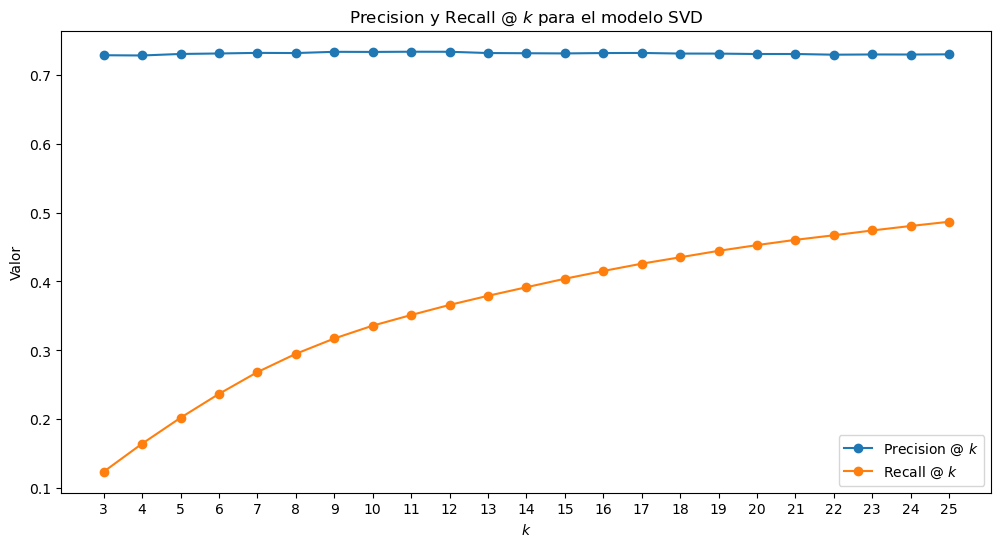

In [55]:
# Parte 4: Calcular los promedios de precisión y recall @ k, para distintos k y graficar los resultados
k_values = range(3, 26)
mean_precisions = []
mean_recalls = []

for k in k_values:
    precisions, recalls = precision_recall_at_k(predictions_svd, k=k)
    mean_precisions.append(np.mean(list(precisions.values())))
    mean_recalls.append(np.mean(list(recalls.values())))

plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_precisions, marker='o', label='Precision @ $k$')
plt.plot(k_values, mean_recalls, marker='o', label='Recall @ $k$')
plt.title('Precision y Recall @ $k$ para el modelo SVD')
plt.xlabel('$k$')
plt.ylabel('Valor')
plt.xticks(k_values)
plt.legend()
plt.show()

> **Respuesta:** Notamos que la precisión se mantiene prácticamente constante a medida que aumenta el $k$, pero el recall aumenta lo cual tiene sentido pues a mayor cantidad de recomendaciones, mayor probabilidad hay que algunas de ellas sean relevantes.

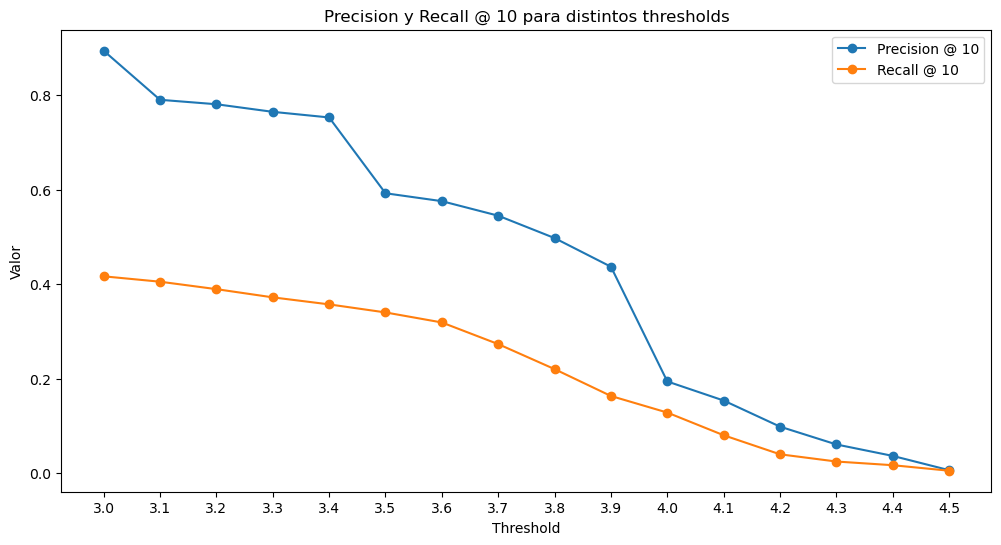

In [56]:
# Parte 5: Calcular la precisión y recall @ k para distintos thresholds y graficar los resultados
thresholds = np.arange(3.0, 4.6, 0.1)
mean_precisions_threshold = []
mean_recalls_threshold = []
for threshold in thresholds:
    precisions, recalls = precision_recall_at_k(predictions_svd, threshold=threshold)
    mean_precisions_threshold.append(np.mean(list(precisions.values())))
    mean_recalls_threshold.append(np.mean(list(recalls.values())))

plt.figure(figsize=(12, 6))
plt.plot(thresholds, mean_precisions_threshold, marker='o', label='Precision @ 10')
plt.plot(thresholds, mean_recalls_threshold, marker='o', label='Recall @ 10')
plt.title('Precision y Recall @ 10 para distintos thresholds')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.xticks(thresholds)
plt.legend()
plt.show()

> **Respuesta:** Notamos de este gráfico que a medida que el threshold de relevancia se pone más exigente, el modelo es cada vez menos preciso en la recomendación de items relevantes. Esto en la práctica es algo obvio pues mientras mayor sea la expectativa de calificación de un ítem "relevante", menos serán las cervezas/productos que el usuario considere efectivamente relevantes.

# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
